In [63]:
import os
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [99]:
accidents = pd.read_csv('accident_dataset_UK.csv',index_col='Accident_ID')

print('Loaded')
accidents.head()

Loaded


,Accident_Severity,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Time,Age_of_Vehicle,Number_of_Vehicles,Number_of_Casualties,...,Vehicle_Manoeuvre,Sex_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type,Junction_Control,Carriageway_Hazards,Skidding_and_Overturning,Hit_Object_in_Carriageway,latitude,longitude
Accident_ID,,,,,,,,,,,,,,,,,,,,,
ACC00001,1,47.782299,Daylight,Fine,Dry,Urban,Morning,8.0,3.0,1.0,...,Going ahead,Male,26-35,Urban area,Give way,NaN,NaN,NaN,51.836598,-0.466477
ACC00002,1,48.620913,Daylight,Fine,Snow,Urban,Morning,1.0,1.0,3.0,...,Turning right,Female,36-45,Urban area,Auto traffic signal,NaN,NaN,NaN,51.596210,0.001313
ACC00003,1,76.906798,Daylight,Fine,Wet,Urban,Early Morning,1.0,1.0,1.0,...,Going ahead,Female,26-35,Urban area,Auto traffic signal,NaN,NaN,Kerb,51.595999,-0.362358
ACC00004,3,89.919979,Darkness,Fog,Icy,Rural,Afternoon,38.0,2.0,7.0,...,Overtaking,Male,65+,Rural area,Uncontrolled,Parked vehicle,Skidded,Other object,51.306665,0.157692
ACC00005,3,67.664273,Darkness,Fog,Icy,Rural,Early Morning,6.0,4.0,1.0,...,Overtaking,Female,56-65,Rural area,Uncontrolled,Pedestrian in carriageway,Skidded,Kerb,52.501890,-0.534768


In [101]:
print(accidents.isna().sum())

Accident_Severity               0
Speed_limit                     0
Light_Conditions                0
Weather_Conditions              0
Road_Surface_Conditions         0
Urban_or_Rural_Area             0
Time                            0
Age_of_Vehicle                  0
Number_of_Vehicles              0
Number_of_Casualties            0
Vehicle_Type                    0
Vehicle_Manoeuvre               0
Sex_of_Driver                   0
Age_Band_of_Driver              0
Driver_Home_Area_Type           0
Junction_Control                0
Carriageway_Hazards          1140
Skidding_and_Overturning     1641
Hit_Object_in_Carriageway    1344
latitude                        0
longitude                       0
dtype: int64


In [103]:
print(accidents["Skidding_and_Overturning"].unique())

[nan 'Skidded' 'Overturned']


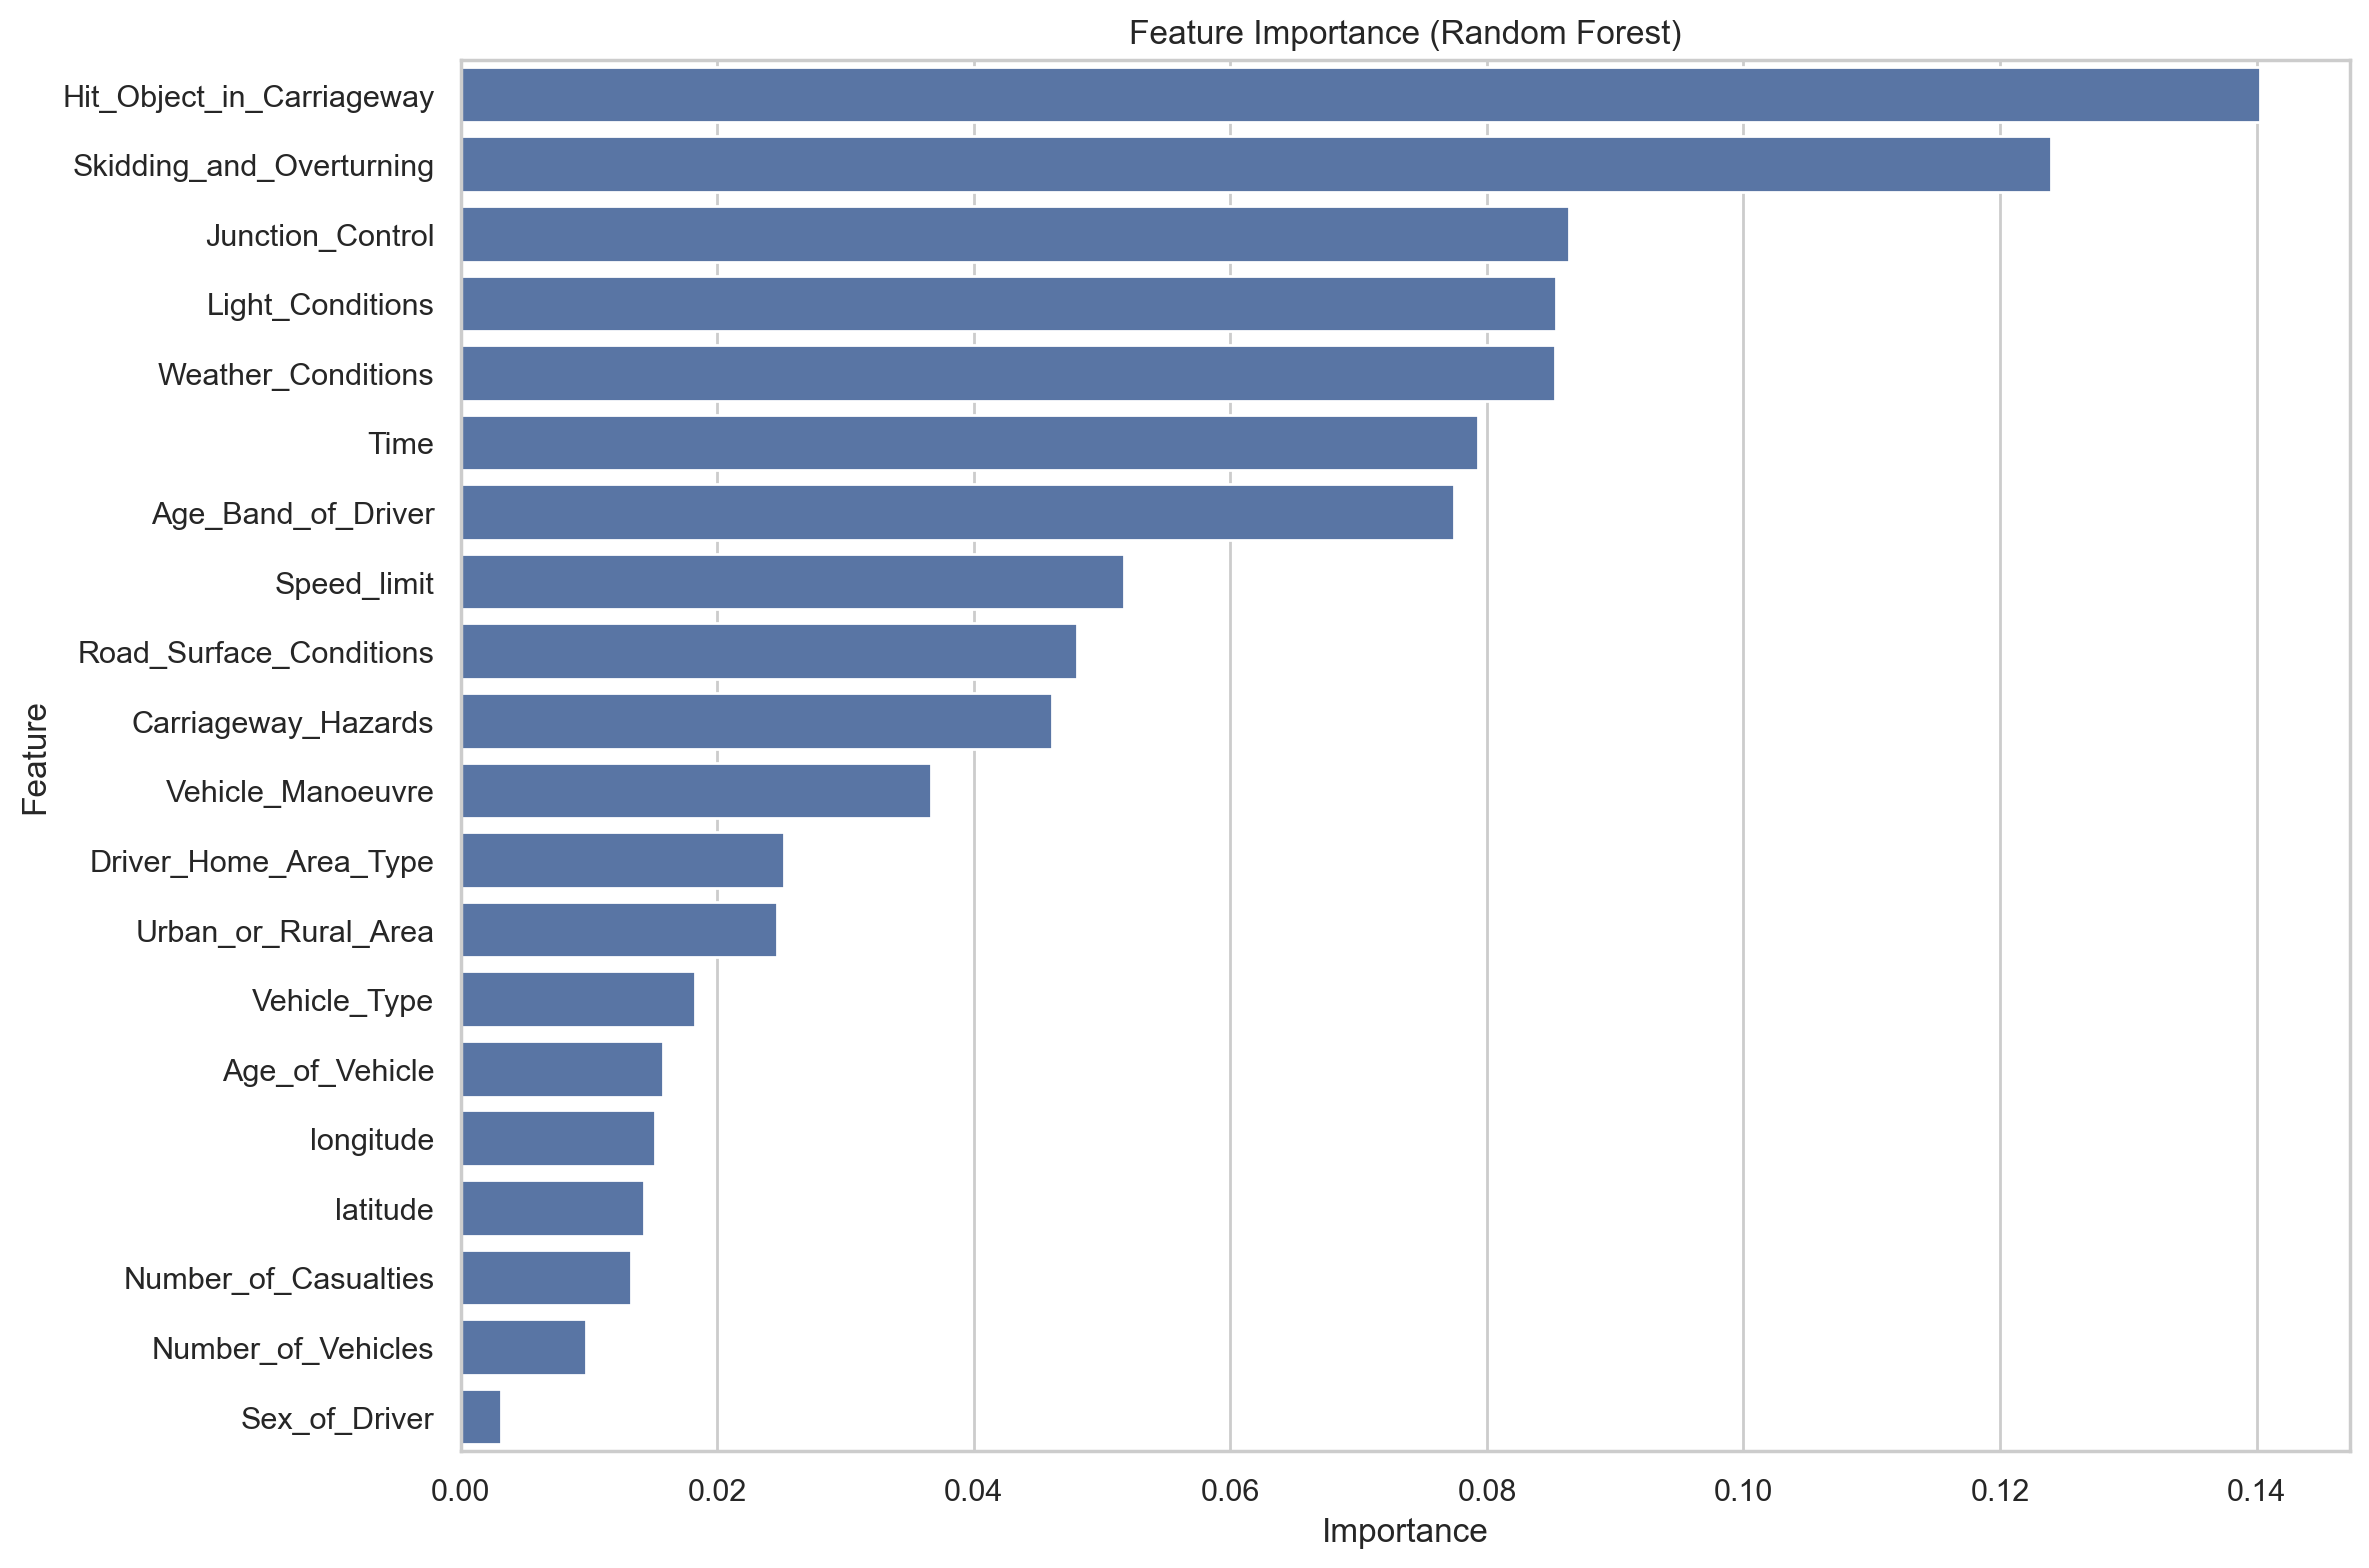

In [115]:


df = pd.read_csv("accident_dataset_UK.csv")

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'Accident_ID':  # skip the ID column
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])
        label_encoders[col] = le

# Define features and target
X = df_encoded.drop(columns=['Accident_ID', 'Accident_Severity'])
y = df_encoded['Accident_Severity']

# Fit Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()


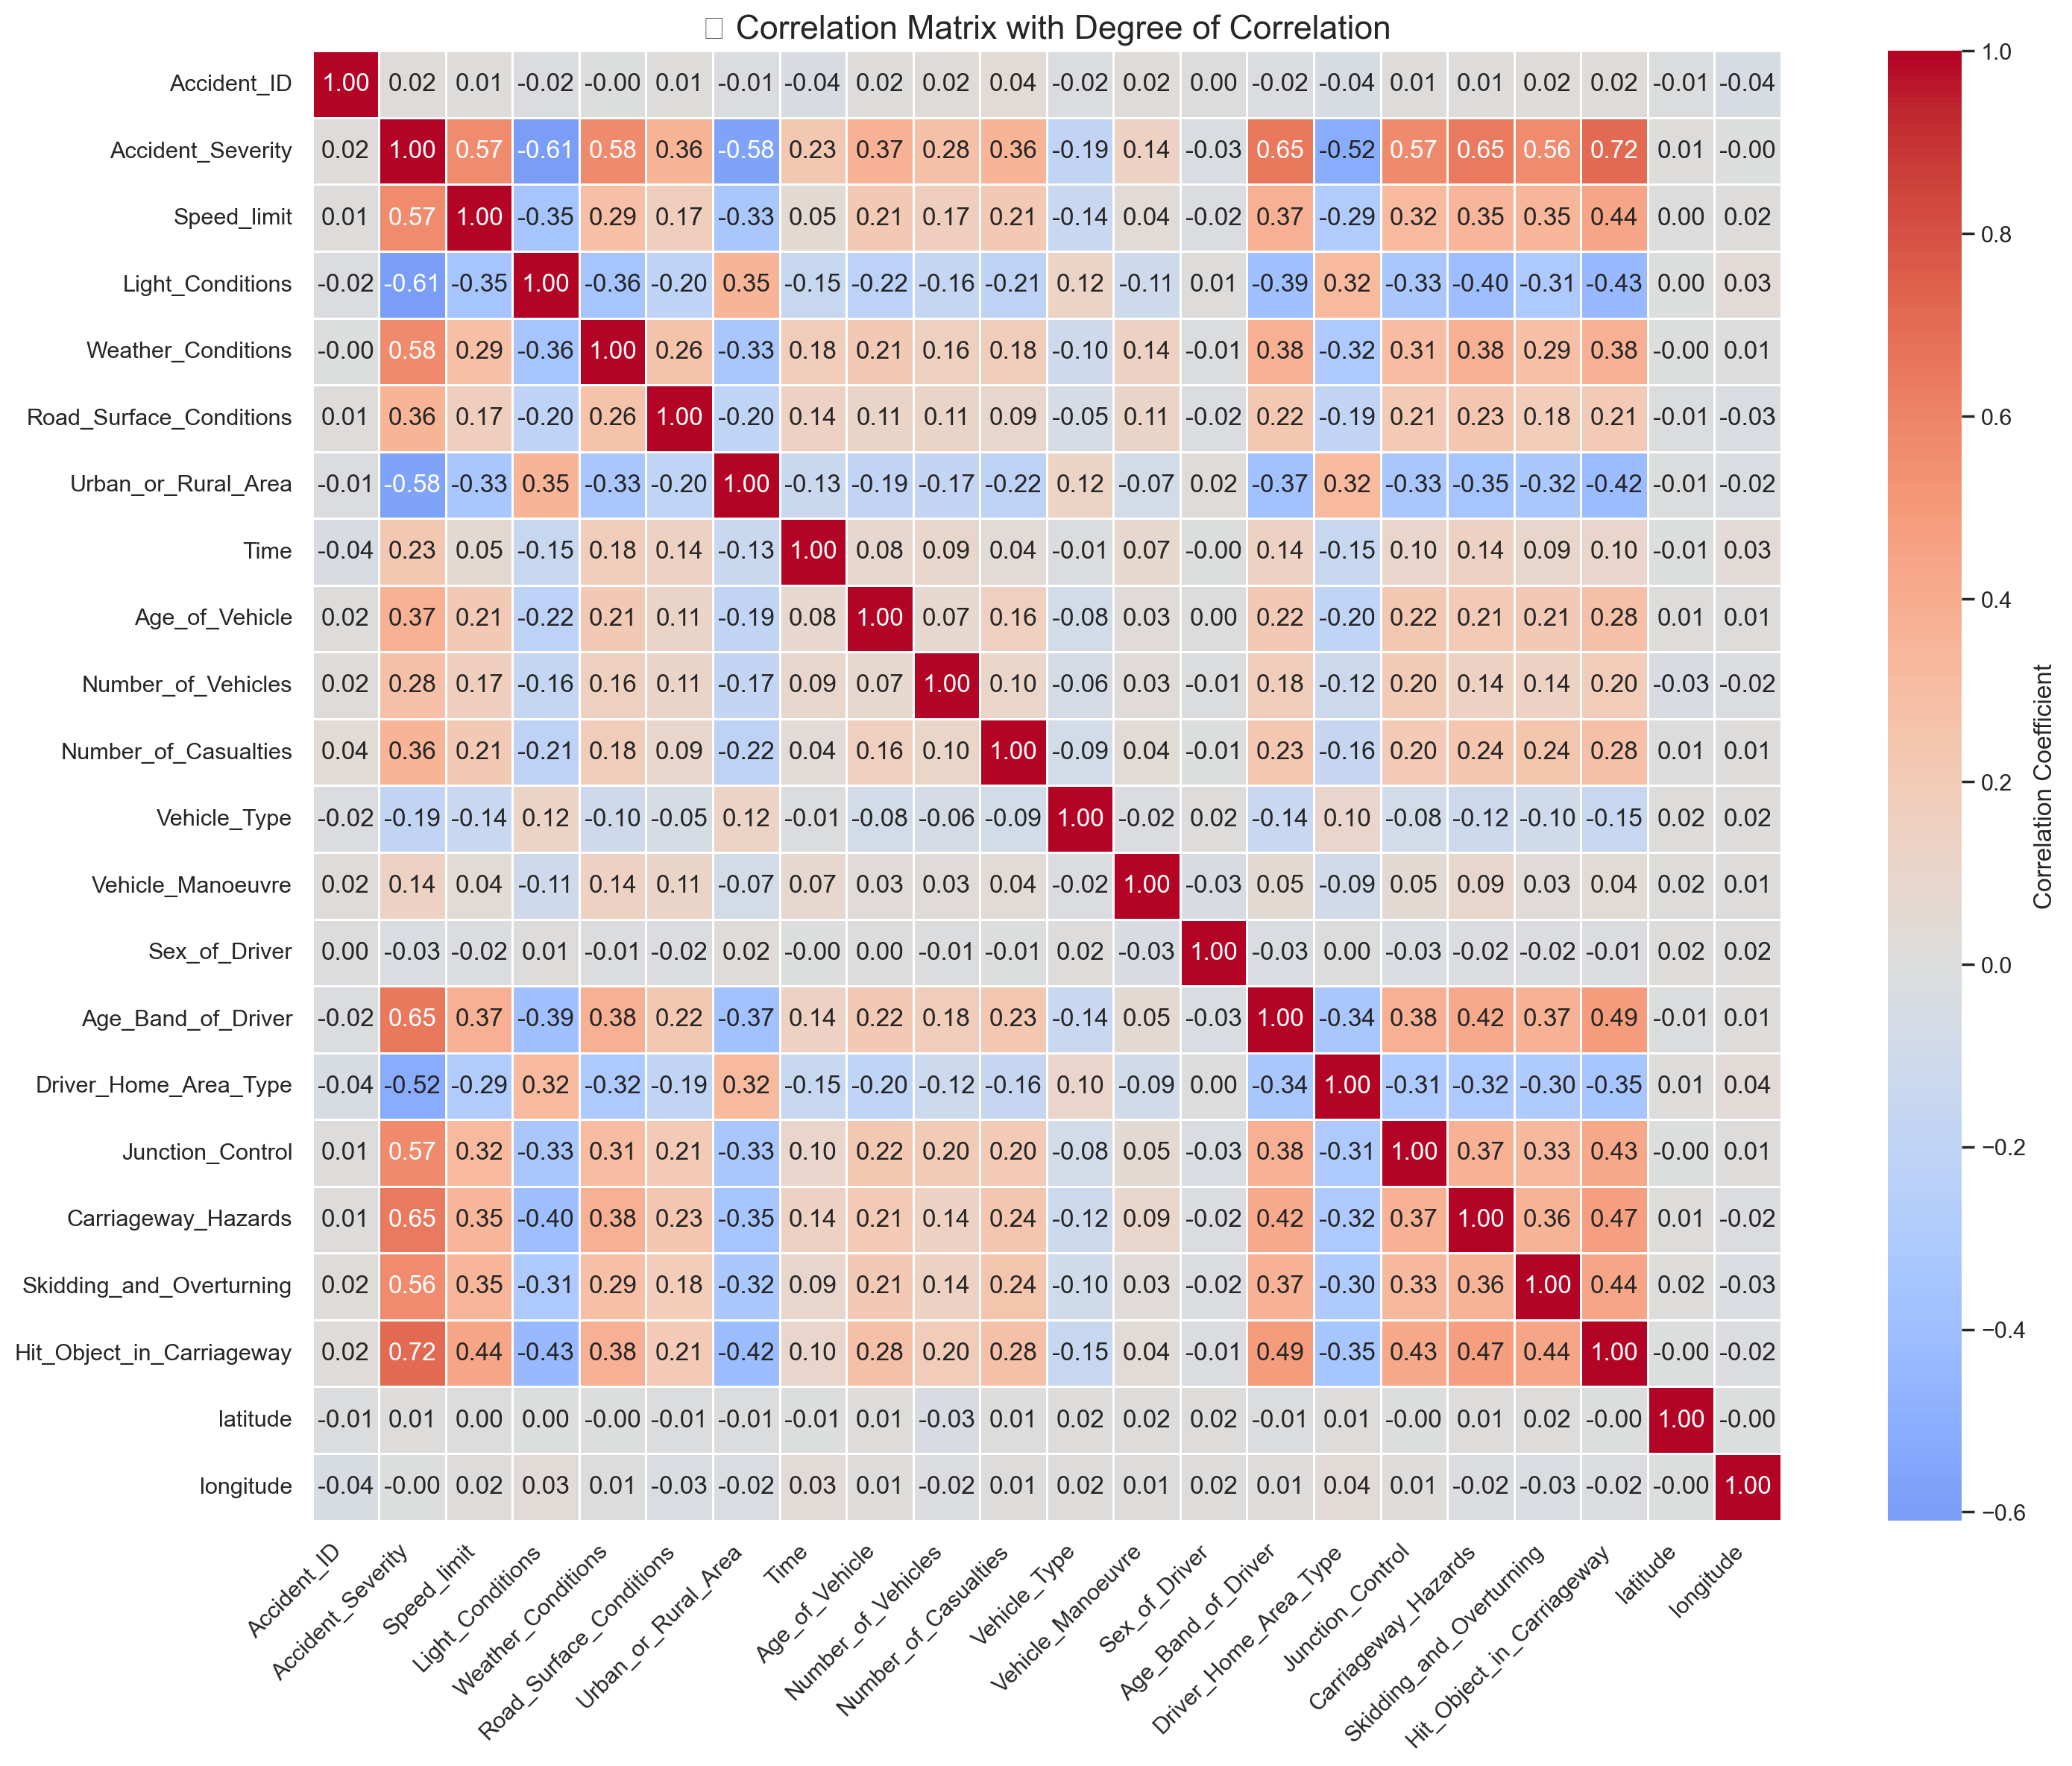

In [117]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            cbar_kws={'label': 'Correlation Coefficient'}, linewidths=0.5, square=True)

plt.title("🔗 Correlation Matrix with Degree of Correlation", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


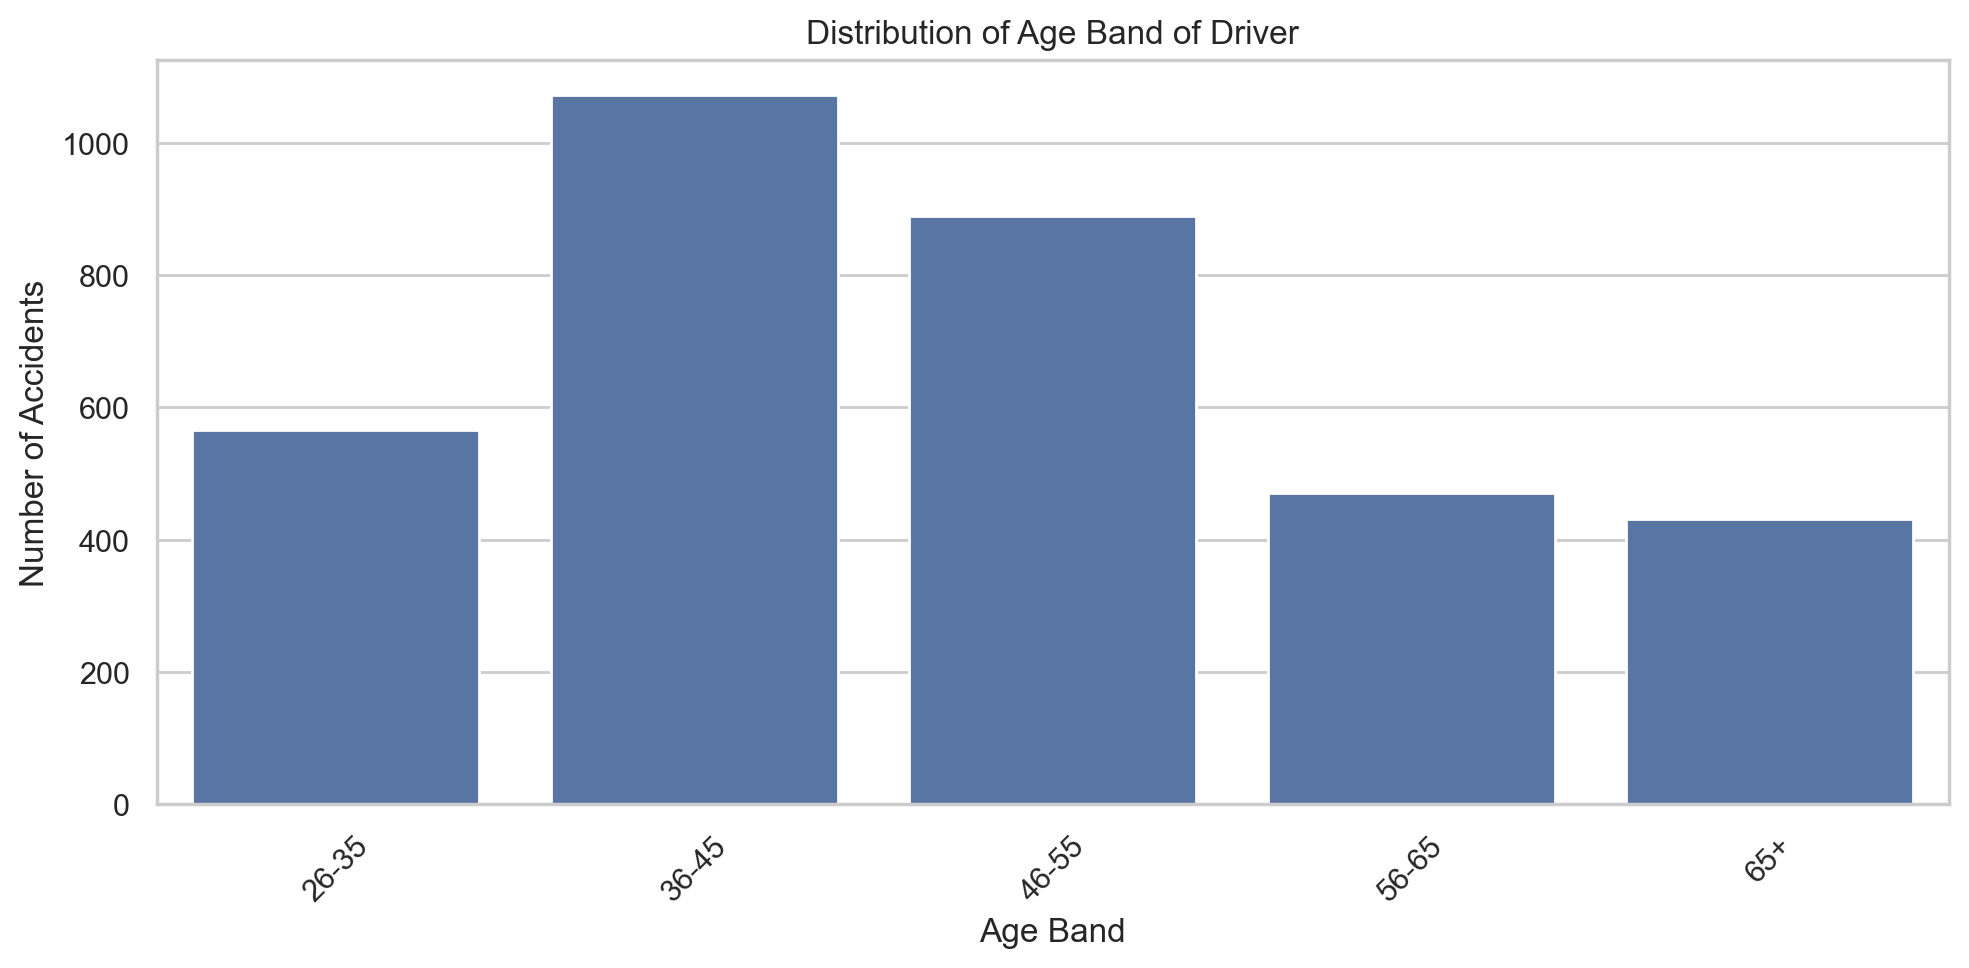

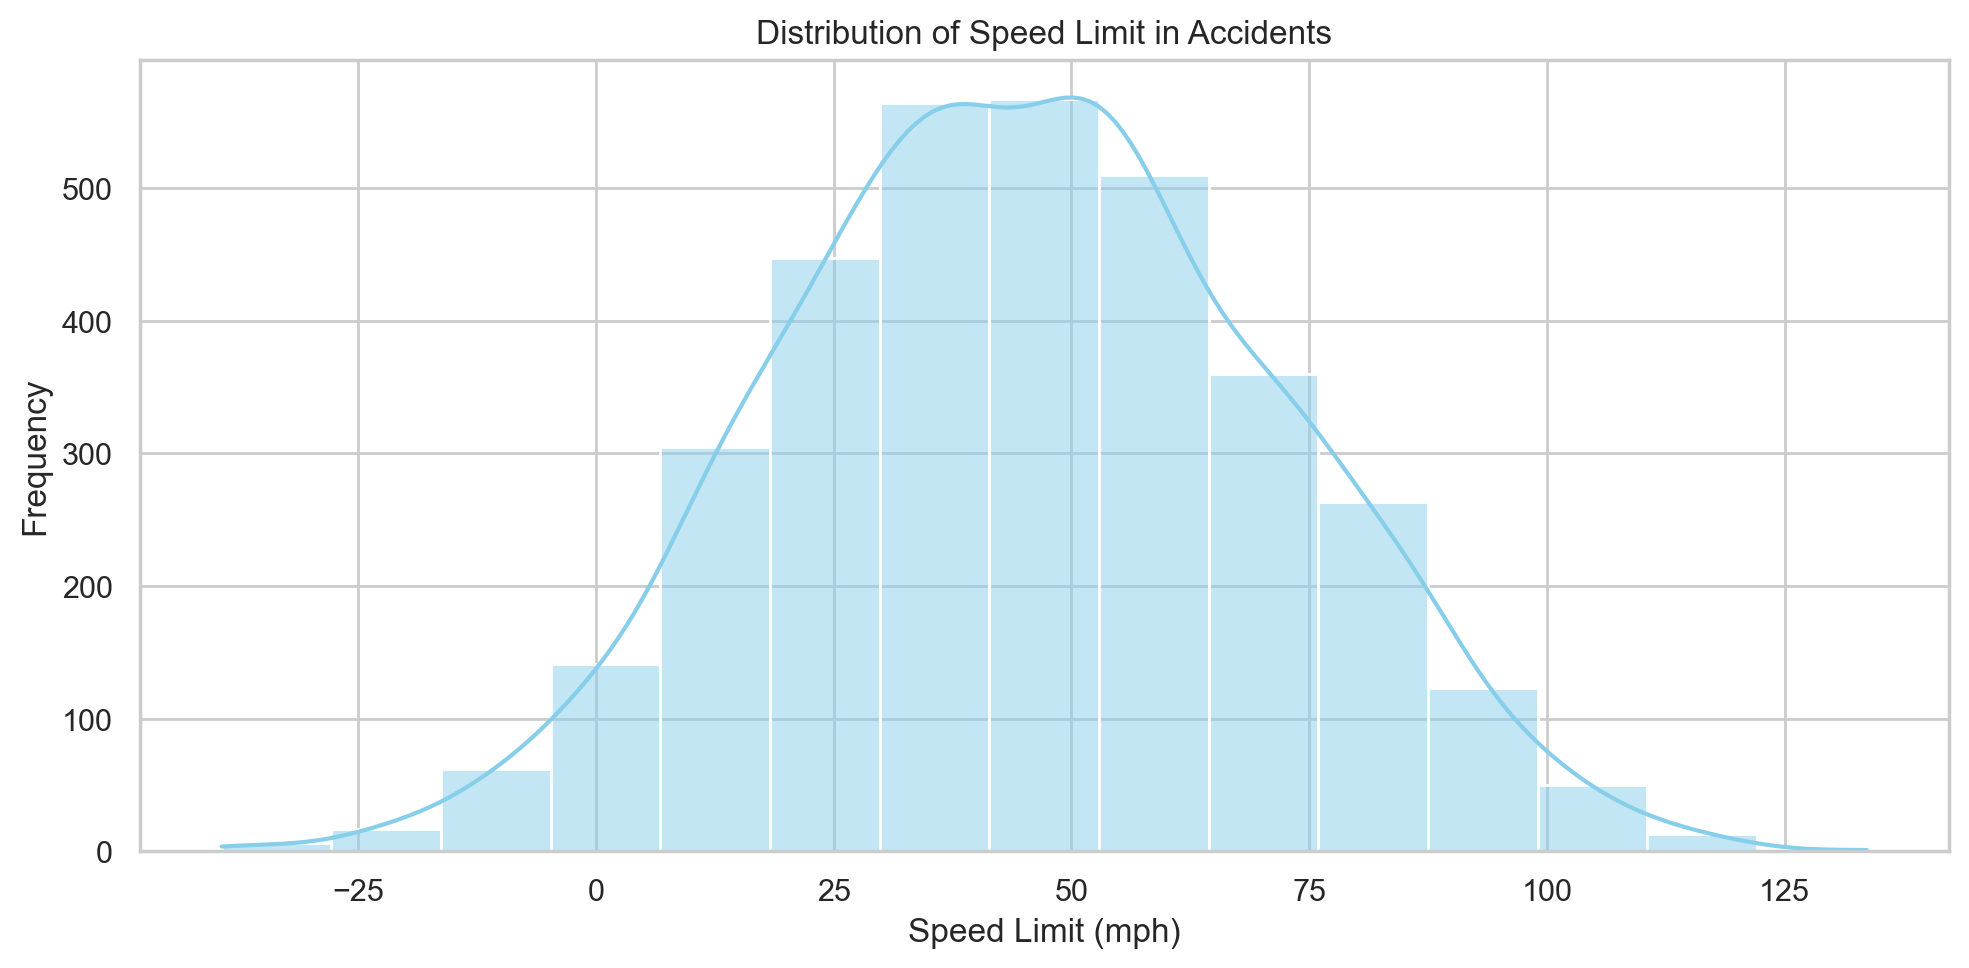

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Age_Band_of_Driver', order=sorted(df['Age_Band_of_Driver'].unique()))
plt.title("Distribution of Age Band of Driver")
plt.xlabel("Age Band")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Speed_limit'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Speed Limit in Accidents")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [123]:

categorical_cols = accidents.select_dtypes(include=['object']).columns


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    accidents[col] = le.fit_transform(accidents[col])
    label_encoders[col] = le  # Save encoders for later use

print("Categorical features encoded successfully.")



Categorical features encoded successfully.


In [125]:
from sklearn.model_selection import train_test_split

X = accidents.drop(columns=['Accident_Severity'])
y = accidents['Accident_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (2743, 20), Testing set size: (686, 20)


In [127]:
non_numeric_columns = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_columns)
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding to categorical columns
X = pd.get_dummies(X, columns=non_numeric_columns, drop_first=True)

print("Categorical features encoded successfully!")
print(f"New feature count: {X.shape[1]}")


Non-numeric columns:
 Index([], dtype='object')
Categorical features encoded successfully!
New feature count: 20


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 96.94%
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.97      0.96       228
           2       0.97      0.94      0.95       229
           3       0.99      1.00      1.00       229

    accuracy                           0.97       686
   macro avg       0.97      0.97      0.97       686
weighted avg       0.97      0.97      0.97       686



<Figure size 800x600 with 0 Axes>

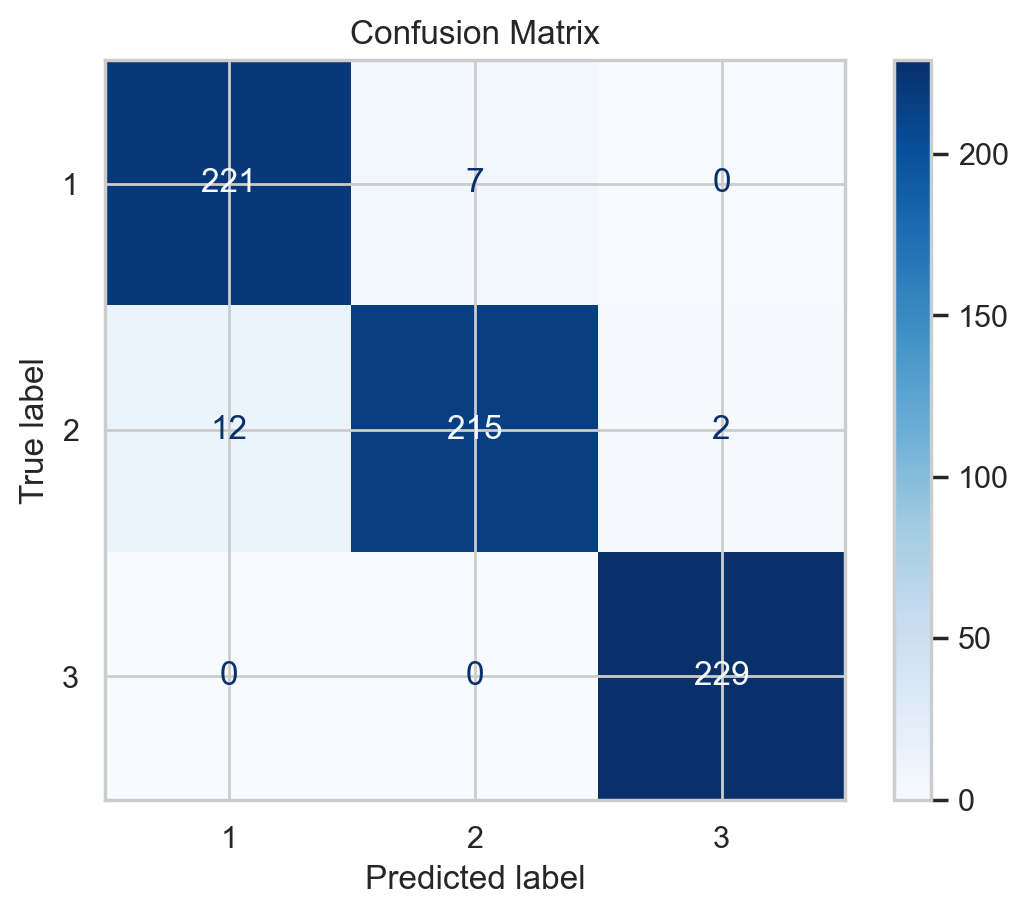

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [133]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X, y, cv=skf, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Average CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy Scores: [0.9606414  0.97813411 0.97521866 0.98833819 0.96934307]
Average CV Accuracy: 97.43%


In [135]:
from sklearn.model_selection import RandomizedSearchCV

# Define search space
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=3,
                                   scoring='accuracy',
                                   random_state=42,
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
print("Best Parameters Found:", random_search.best_params_)

# Retrain with best model
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)
y_best_pred = best_rf.predict(X_test)

# Evaluation
print("Tuned Accuracy: {:.2f}%".format(accuracy_score(y_test, y_best_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_best_pred))


Best Parameters Found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': True}
Tuned Accuracy: 96.79%
Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.96      0.96       228
           2       0.96      0.94      0.95       229
           3       0.99      1.00      1.00       229

    accuracy                           0.97       686
   macro avg       0.97      0.97      0.97       686
weighted avg       0.97      0.97      0.97       686



In [92]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [147]:
import folium
from folium.plugins import HeatMap

df = pd.read_csv('accident_dataset_UK.csv')

# Create base map centered around UK
map_center = [df['latitude'].mean(), df['longitude'].mean()]
base_map = folium.Map(location=map_center, zoom_start=6)

# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=30, blur=20).add_to(base_map)

# Display the map
base_map
